# Dilation, Erosion and Morphology
Dilation and erosion are known as morphological operations. They are often performed on binary images, similar to contour detection. Dilation enlarges bright, white areas in an image by adding pixels to the perceived boundaries of objects in that image. Erosion does the opposite: it removes pixels along object boundaries and shrinks the size of objects.

Often these two operations are performed in sequence to enhance important object traits.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

%matplotlib inline

shape (301, 225)


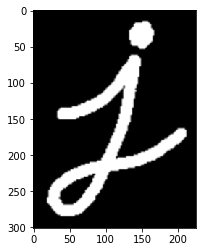

In [2]:
img_j = cv.imread('images/j.png', cv.IMREAD_GRAYSCALE)
print(f'shape {img_j.shape}')

plt.imshow(img_j, cmap='gray')
plt.show()

## Dilation
To dilate an image in `OpenCV`, you can use the `dilate` function and three inputs: an original binary image, a kernel that determines the size of the dilation (None will result in a default size), and a number of iterations to perform the dilation (typically = 1). In the below example, we have a `5x5` kernel of ones, which move over an image, like a filter, and turn a pixel white if any of its surrounding pixels are white in a `5x5` window! We’ll use a simple image of the cursive letter “j” as an example.
## Erosion
To erode an image, do the same but with the `erode` function.

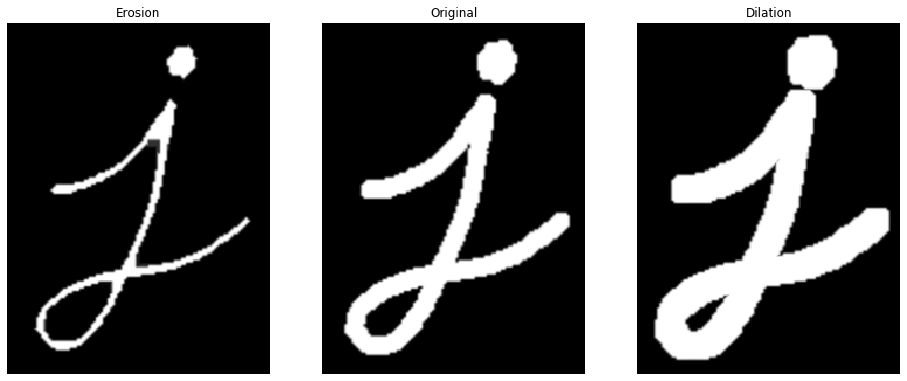

In [3]:
# create a 5x5 kernel of ones
kernel = np.ones((5, 5), np.uint8)

# Dilate the image
dilation = cv.dilate(img_j, kernel, iterations=2)

# Erode the image
erosion = cv.erode(img_j, kernel, iterations=2)

plt.figure(figsize=(16,10))

plt.subplot(131)
plt.axis('off')
plt.title('Erosion')
plt.imshow(erosion, cmap='gray')

plt.subplot(132)
plt.axis('off')
plt.title('Original')
plt.imshow(img_j, cmap='gray')

plt.subplot(133)
plt.axis('off')
plt.title('Dilation')
plt.imshow(dilation, cmap='gray')

plt.show()

## Opening
As mentioned, above, operations of erosion and dilation are often combined for desired results. One such combination is called opening, which is erosion followed by dilation. This is useful in noise reduction in which erosion first gets rid of noise (and shrinks the object) then dilation enlarges the object again, but the noise will have disappeared from the previous erosion.

To implement this in `OpenCV`, use the function `morphologyEx` with the noise background image, the operation we want to perform, and our kernel passed in.

shape (308, 228)


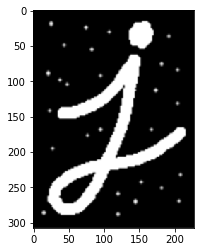

In [4]:
j_bgnoise = cv.imread('images/j-bg-noise.png', cv.IMREAD_GRAYSCALE)
print(f'shape {j_bgnoise.shape}')

plt.imshow(j_bgnoise, cmap='gray')
plt.show()

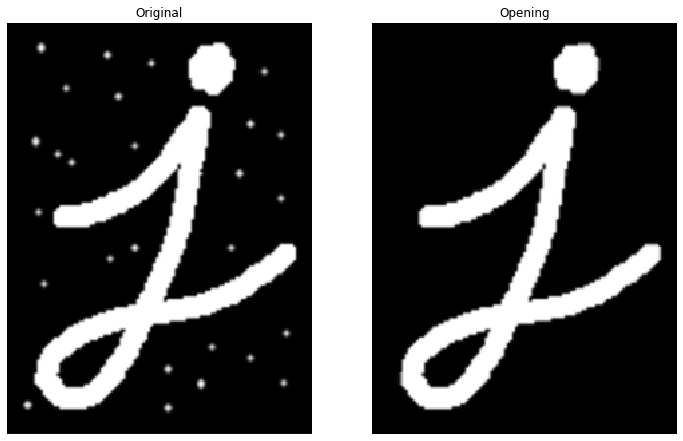

In [5]:
# create a 5x5 kernel of ones
kernel = np.ones((5, 5), np.uint8)

opening = cv.morphologyEx(j_bgnoise, cv.MORPH_OPEN, kernel, iterations=2)

plt.figure(figsize=(12,10))

plt.subplot(121)
plt.axis('off')
plt.title('Original')
plt.imshow(j_bgnoise, cmap='gray')

plt.subplot(122)
plt.axis('off')
plt.title('Opening')
plt.imshow(opening, cmap='gray')

plt.show()

## Closing
Closing is the reverse combination of opening; it’s dilation followed by erosion, which is useful in closing small holes or dark areas within an object.

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

shape (310, 231)


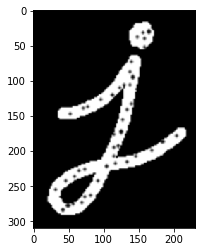

In [6]:
j_fgnoise = cv.imread('images/j-fg-noise.png', cv.IMREAD_GRAYSCALE)
print(f'shape {j_fgnoise.shape}')

plt.imshow(j_fgnoise, cmap='gray')
plt.show()

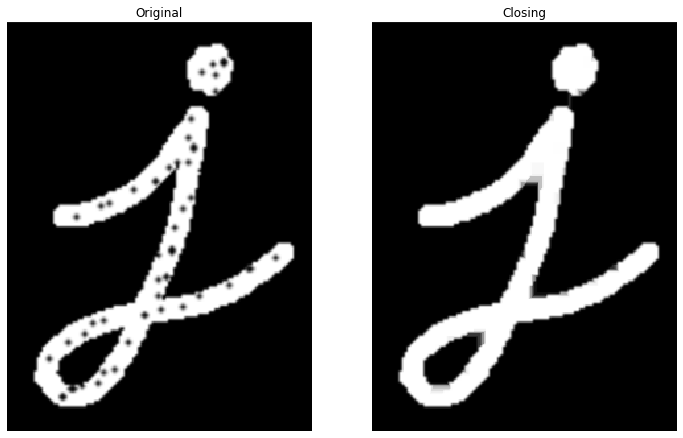

In [7]:
# create a 5x5 kernel of ones
kernel = np.ones((5, 5), np.uint8)

opening = cv.morphologyEx(j_fgnoise, cv.MORPH_CLOSE, kernel, iterations=2)

plt.figure(figsize=(12,10))

plt.subplot(121)
plt.axis('off')
plt.title('Original')
plt.imshow(j_fgnoise, cmap='gray')

plt.subplot(122)
plt.axis('off')
plt.title('Closing')
plt.imshow(opening, cmap='gray')

plt.show()